In [1]:
using OpenStreetMapX
using Downloads
using GZip
using PyCall
using DataFrames
using Statistics
using Plots
include("analyse.jl")
include("prepare_data.jl")

get_POI (generic function with 3 methods)

In [2]:
download_data("Cracow")

In [4]:
df_cracow = get_POI("Cracow.osm",nothing,"Cracow.csv")

,elemtype,elemid,nodeid,lat,lon,key,value
,Symbol,Int64,Int64,Float64,Float64,String,String
1,node,26860287,26860287,50.0155,19.9245,tourism,camp_site
2,node,29783000,29783000,50.0849,20.0204,public_transport,stop_position
3,node,30371892,30371892,50.0364,19.8253,public_transport,stop_position
4,node,30372002,30372002,50.0488,19.9016,public_transport,stop_position
5,node,32063299,32063299,50.0952,19.989,public_transport,stop_position
6,node,34806198,34806198,50.072,20.1054,public_transport,stop_position
7,node,41943557,41943557,50.0836,19.8597,public_transport,station
8,node,41943557,41943557,50.0836,19.8597,railway,station
9,node,48522023,48522023,50.1075,19.9955,public_transport,station


In [5]:
center_cracow = LLA(50.061692315544654, 19.939496620660737)
ix_cracow = AttractivenessSpatIndex(df_cracow)

AttractivenessSpatIndex{AttractivenessMetaPOI, typeof(get_attractiveness_group)}(SpatialIndexing.RTree{Float64, 2, SpatialIndexing.SpatialElem{Float64, 2, Int64, OSMToolset.AttractivenessData{AttractivenessMetaPOI}}}(variant=RTreeStar, tight_mbrs=true, nearmin_overlap=32, fill_factor=0.7, split_factor=0.4, reinsert_factor=0.3, leaf_capacity=100, branch_capacity=100)
37357 element(s) in 3 level(s) (1, 4, 400 node(s) per level):
 level=3 nchildren=4 mbr=((-19638.084054045692, -18653.53222107778), (17046.38739447557, 16887.376164540005)), 37357×10 DataFrame
   Row │ elemtype  elemid    nodeid       lat      lon      key                ⋯
       │ Symbol    Int64     Int64        Float64  Float64  String             ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │ node      26860287     26860287  50.0155  19.9245  tourism            ⋯
     2 │ node      29783000     29783000  50.0849  20.0204  public_transport
     3 │ node      30371892     303718

In [11]:
points_cracow = generate_sectors(500,10,center_cracow,360)

500×360 Matrix{LLA}:
 LLA(50.0617, 19.9396, 7.82218e-6)   …  LLA(50.0617, 19.9396, 7.82311e-6)
 LLA(50.0617, 19.9398, 3.12952e-5)      LLA(50.0617, 19.9398, 3.12952e-5)
 LLA(50.0617, 19.9399, 7.04136e-5)      LLA(50.0617, 19.9399, 7.04145e-5)
 LLA(50.0617, 19.9401, 0.000125179)     LLA(50.0617, 19.9401, 0.000125181)
 LLA(50.0617, 19.9402, 0.000195595)     LLA(50.0617, 19.9402, 0.000195595)
 LLA(50.0617, 19.9403, 0.000281659)  …  LLA(50.0617, 19.9403, 0.000281658)
 LLA(50.0617, 19.9405, 0.000383369)     LLA(50.0617, 19.9405, 0.000383369)
 LLA(50.0617, 19.9406, 0.000500726)     LLA(50.0617, 19.9406, 0.000500725)
 LLA(50.0617, 19.9408, 0.000633731)     LLA(50.0617, 19.9408, 0.000633731)
 LLA(50.0617, 19.9409, 0.000782384)     LLA(50.0617, 19.9409, 0.000782383)
 ⋮                                   ⋱  
 LLA(50.0624, 20.0082, 1.89387)         LLA(50.0617, 20.0082, 1.89387)
 LLA(50.0624, 20.0083, 1.90158)         LLA(50.0617, 20.0083, 1.90158)
 LLA(50.0624, 20.0085, 1.9093)          LLA(50.06

In [12]:
attr = calculate_attractiveness_of_sector(points_cracow,ix_cracow,:transport)

500-element Vector{Float64}:
 0.477644850130913
 0.8971662303410853
 1.4212590888518484
 1.9720023029374734
 2.522843984512479
 3.122472010310036
 3.738033626394051
 4.387314295865675
 5.081800341890508
 5.782343265671485
 ⋮
 5.098795493734133
 5.092477572595361
 5.092574827966378
 5.0953958956065595
 5.100754175569007
 5.107173791432527
 5.113105386662804
 5.12049652614024
 5.127270203789749

In [ ]:
x_axis = [i for i in 1:500]

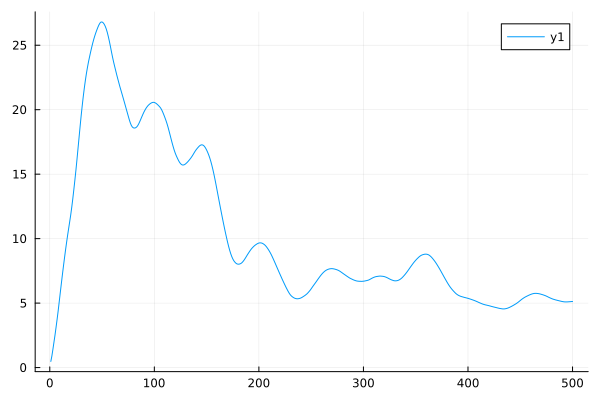

In [14]:
plot(x_axis,attr)